In [1]:
import pandas as pd
import numpy as np

from dataset_process import dataset_to_df, search_df
import matplotlib as mpl
import matplotlib.pyplot as plt
import pywt
import cv2 as cv
from skimage.feature import hog
from skimage import exposure

In [2]:
path2 = '../../data/meso_data'
relative_paths2= ["/Real", "/DeepFake"]
paths_classes2=['REAL',"FAKE"]


df_all2, df_train2, df_val2, df_test2, classes_stats2 = dataset_to_df(
    path2, relative_paths2, paths_classes2, 0.8, 0.19, 0.01)

search_df(df_all2,"82_678")

2937

In [8]:
img = plt.imread(df_all2.iloc[2937, 0])

imgYCC = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
img_Y, _, _ = cv.split(imgYCC)

_, hog_img = hog(img, orientations=9, pixels_per_cell=(
    16, 16), cells_per_block=(22, 22), visualize=True, channel_axis=-1)

hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

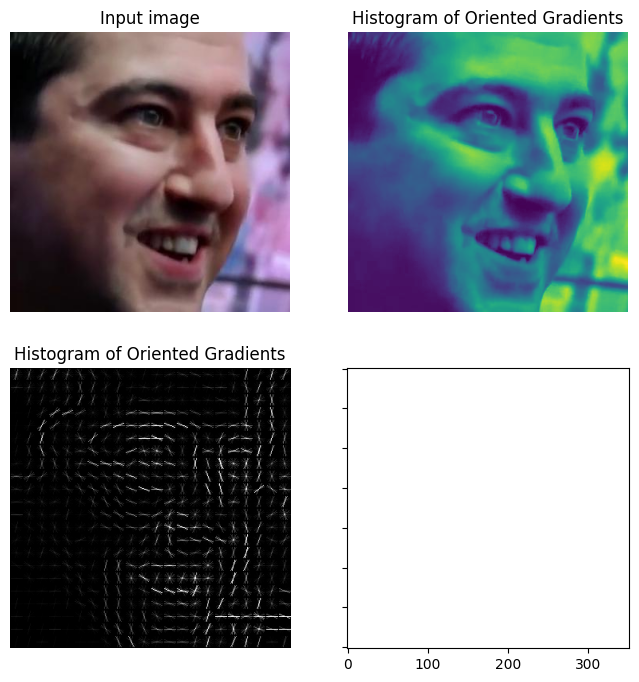

In [9]:
fig, ax = plt.subplots(2,2,figsize=(8, 8), sharex=True, sharey=True)
ax[0,0].axis('off')
ax[0,0].imshow(img, cmap=plt.cm.gray)
ax[0,0].set_title('Input image')
# Rescale histogram for better display


ax[0,1].axis('off')
ax[0,1].imshow(img_Y)
ax[0,1].set_title('Histogram of Oriented Gradients')


ax[1,0].axis('off')
ax[1,0].imshow(hog_img_rescaled, cmap=plt.cm.gray)
ax[1,0].set_title('Histogram of Oriented Gradients')


plt.show()